## Least Squares solution for linear regression

The cost function of Least Squares method should be: $ J(\mathbf{w}) = \frac{1}{2N}\Sigma\left\| \mathbf{Xw} - \mathbf{y} \right\|^2 + \lambda \left\| \mathbf{w} \right\|^2$ 

To find the minimum of $J(\mathbf{w})$, we take the derivative with respect to $\mathbf{w}$:  $ \frac{dJ(\mathbf{w})}{d\mathbf{w}} = \frac{1}{N}\mathbf{X}^T(\mathbf{Xw} - \mathbf{y}) + 2\lambda \mathbf{w} $

Setting the derivative to zero gives us a system of linear equations. And we can solve it as below:

$$ 
\begin{align*}
& \frac{1}{N}\mathbf{X}^T \mathbf{Xw} - \frac{1}{N}\mathbf{X}^T \mathbf{y} + \lambda \mathbf{w} = 0 \\
& (\frac{1}{N}\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})\mathbf{w} = \frac{1}{N}\mathbf{X}^T \mathbf{y} \\
& \mathbf{w} = \frac{1}{N}(\frac{1}{N}\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{y} 
\end{align*} 
$$

But typically, we would use the formula below for the code:

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \left( \frac{1}{N}(\mathbf{w}_{\text{old}}^T \mathbf{x} - y) \mathbf{x} + 2\lambda \mathbf{w}_{\text{old}} \right)
$$

### Data Preparation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('boston.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
legend = list(data.columns)[:-1]
legend_b = legend + ['BIAS']
legend_b

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'BIAS']

In [3]:
print(data.shape, data.isna().values.any(), data.duplicated().values.any())

(506, 14) False False


In [4]:
# Split data
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [5]:
X_train = np.array(X_train.values.tolist())
X_test = np.array(X_test.values.tolist())
y_train = np.array(y_train.values.tolist())
y_test = np.array(y_test.values.tolist())

In [6]:
def Z_score(data):
  mean = np.mean(data, axis=0)
  std_dev = np.std(data, axis=0)
  data_normalized = (data - mean) / std_dev
  return data_normalized

def min_max(data):
  min_values = np.min(data, axis=0)
  max_values = np.max(data, axis=0)
  data_normalized = (data - min_values) / (max_values - min_values)
  return data_normalized

X_train = Z_score(X_train)
X_test = Z_score(X_test)
y_train = Z_score(y_train)
y_test = Z_score(y_test)

In [7]:
def ls_norm(data, label, w, lr, lam, train=True):
  J = 0
  N = data.shape[0]
  gradient = 0
  
  for d, l in zip(data, label):
    pred = w.T @ d
    gradient += (l - pred) * d / N
    J += np.power((l - pred), 2) / (2*N)
  
  J += lam * (w.T @ w)
  print('Error: ', J)
  if train:
    w += lr * (gradient + 2*lam*w)
    print("W_: ", w)
    return w, J
  else:
    return J

In [8]:
weights = np.random.rand(X_train.shape[1])*0.5
# weights = np.full(X_train.shape[1], 0.1)
bias = np.random.rand(1)
learning_rate = 0.01

In [9]:
weights

array([0.48524184, 0.16782119, 0.21082452, 0.10751877, 0.36596647,
       0.25004375, 0.01700341, 0.13018998, 0.13033926, 0.49778919,
       0.33911124, 0.42529518, 0.15191011])

In [10]:
# No bias
epoch = 300
lambda_ = 0.15
dataset_ = zip(X_train, y_train)
weight_history = []
error_history = []

for e in range(epoch):
    print("==== Epoch: {} ====".format(e))
    weights, loss = ls_norm(X_train, y_train, weights, learning_rate, lambda_)
    print("W: ", weights)
    weight_history.append(weights)
    error_history.append(loss)

==== Epoch: 0 ====
Error:  2.123949691416793
W_:  [0.47305047 0.17578772 0.19783191 0.10862974 0.35396943 0.2607512
 0.00660661 0.14003742 0.11557813 0.48308982 0.32794772 0.43193569
 0.13779624]
W:  [0.47305047 0.17578772 0.19783191 0.10862974 0.35396943 0.2607512
 0.00660661 0.14003742 0.11557813 0.48308982 0.32794772 0.43193569
 0.13779624]
==== Epoch: 1 ====
Error:  1.9521878930900085
W_:  [ 0.4614591   0.18316842  0.18562637  0.10973553  0.34274651  0.27098027
 -0.00310352  0.14916925  0.10156488  0.46918094  0.3172918   0.43813498
  0.12438966]
W:  [ 0.4614591   0.18316842  0.18562637  0.10973553  0.34274651  0.27098027
 -0.00310352  0.14916925  0.10156488  0.46918094  0.3172918   0.43813498
  0.12438966]
==== Epoch: 2 ====
Error:  1.799290325448415
W_:  [ 0.45043419  0.18999818  0.17416216  0.11083526  0.33225223  0.28075716
 -0.01216781  0.15762809  0.08825732  0.45601793  0.30711576  0.44391832
  0.1116504 ]
W:  [ 0.45043419  0.18999818  0.17416216  0.11083526  0.33225223  0.2

Error:  0.42760869650709094
W_:  [ 0.19665454  0.20308942  0.01690232  0.15861531  0.22232983  0.54143828
 -0.10355487  0.18238136 -0.20722717  0.2103715   0.046245    0.47727598
 -0.18019832]
W:  [ 0.19665454  0.20308942  0.01690232  0.15861531  0.22232983  0.54143828
 -0.10355487  0.18238136 -0.20722717  0.2103715   0.046245    0.47727598
 -0.18019832]
==== Epoch: 77 ====
Error:  0.426269916748544
W_:  [ 0.19554251  0.20185798  0.01711985  0.15883402  0.22295469  0.54287918
 -0.10309811  0.18099392 -0.20851029  0.20992697  0.04493125  0.47633636
 -0.18157937]
W:  [ 0.19554251  0.20185798  0.01711985  0.15883402  0.22295469  0.54287918
 -0.10309811  0.18099392 -0.20851029  0.20992697  0.04493125  0.47633636
 -0.18157937]
==== Epoch: 78 ====
Error:  0.42495973876348025
W_:  [ 0.19444587  0.20063094  0.01734175  0.15904427  0.2235796   0.5443021
 -0.10264538  0.17961168 -0.20977855  0.20949886  0.04363617  0.47539358
 -0.18294583]
W:  [ 0.19444587  0.20063094  0.01734175  0.15904427  0.

W:  [ 0.15176719  0.14543788  0.02930851  0.16104508  0.25173642  0.59994276
 -0.08765241  0.11785188 -0.26321263  0.20182099 -0.00509832  0.42623296
 -0.24102325]
==== Epoch: 131 ====
Error:  0.38392073122401826
W_:  [ 0.15114319  0.14454802  0.02950105  0.16095666  0.25216846  0.60074012
 -0.08753606  0.1168637  -0.26408774  0.20186706 -0.00576748  0.42532742
 -0.24196734]
W:  [ 0.15114319  0.14454802  0.02950105  0.16095666  0.25216846  0.60074012
 -0.08753606  0.1168637  -0.26408774  0.20186706 -0.00576748  0.42532742
 -0.24196734]
==== Epoch: 132 ====
Error:  0.3835153570900192
W_:  [ 0.15052475  0.14366408  0.02969164  0.16086487  0.25259648  0.60152927
 -0.08742559  0.11588231 -0.26495907  0.20191858 -0.00642886  0.42442418
 -0.24290656]
W:  [ 0.15052475  0.14366408  0.02969164  0.16086487  0.25259648  0.60152927
 -0.08742559  0.11588231 -0.26495907  0.20191858 -0.00642886  0.42442418
 -0.24290656]
==== Epoch: 133 ====
Error:  0.3831191443633659
W_:  [ 0.14991182  0.14278603  0.

Error:  0.370691486423474
W_:  [ 0.11873432  0.09505341  0.03848945  0.14962047  0.27410896  0.63965318
 -0.09096974  0.06197552 -0.31814462  0.21580357 -0.03723733  0.36892307
 -0.29761401]
W:  [ 0.11873432  0.09505341  0.03848945  0.14962047  0.27410896  0.63965318
 -0.09096974  0.06197552 -0.31814462  0.21580357 -0.03723733  0.36892307
 -0.29761401]
==== Epoch: 201 ====
Error:  0.37064713378395375
W_:  [ 0.11838616  0.09447581  0.03856532  0.14941467  0.27433887  0.64002981
 -0.09114862  0.06133082 -0.31886898  0.21613486 -0.03752991  0.3681965
 -0.29830877]
W:  [ 0.11838616  0.09447581  0.03856532  0.14941467  0.27433887  0.64002981
 -0.09114862  0.06133082 -0.31886898  0.21613486 -0.03752991  0.3681965
 -0.29830877]
==== Epoch: 202 ====
Error:  0.37060556333681205
W_:  [ 0.11804075  0.09390139  0.03863985  0.14920843  0.2745669   0.64040216
 -0.09133029  0.06068941 -0.31959239  0.21646929 -0.03781894  0.36747251
 -0.29900092]
W:  [ 0.11804075  0.09390139  0.03863985  0.14920843  0

Error:  0.3710696541621027
W_:  [ 0.10523446  0.07139638  0.04069491  0.14000193  0.28305604  0.65307438
 -0.10166703  0.03523889 -0.35081028  0.23405255 -0.04754678  0.33809663
 -0.32713571]
W:  [ 0.10523446  0.07139638  0.04069491  0.14000193  0.28305604  0.65307438
 -0.10166703  0.03523889 -0.35081028  0.23405255 -0.04754678  0.33809663
 -0.32713571]
==== Epoch: 247 ====
Error:  0.37112427995820385
W_:  [ 0.10499127  0.07094002  0.04071573  0.13979536  0.28322003  0.65328862
 -0.1019468   0.03471373 -0.35151271  0.23451287 -0.04771024  0.3374835
 -0.32772785]
W:  [ 0.10499127  0.07094002  0.04071573  0.13979536  0.28322003  0.65328862
 -0.1019468   0.03471373 -0.35151271  0.23451287 -0.04771024  0.3374835
 -0.32772785]
==== Epoch: 248 ====
Error:  0.3711805955341848
W_:  [ 0.10474996  0.0704858   0.04073547  0.1395891   0.28338298  0.6535
 -0.10222823  0.03419056 -0.35221509  0.23497572 -0.04787153  0.3368727
 -0.32831811]
W:  [ 0.10474996  0.0704858   0.04073547  0.1395891   0.2833

Error:  0.37606747905992055
W_:  [ 0.09463363  0.04978762  0.04038549  0.12969657  0.29058539  0.66100984
 -0.11841015  0.00969249 -0.38831836  0.26175919 -0.05370324  0.30865381
 -0.35618261]
W:  [ 0.09463363  0.04978762  0.04038549  0.12969657  0.29058539  0.66100984
 -0.11841015  0.00969249 -0.38831836  0.26175919 -0.05370324  0.30865381
 -0.35618261]


In [11]:
print("Final train loss is: ", error_history[-1])

Final train loss is:  0.37606747905992055


In [13]:
weight_history

[array([ 0.09463363,  0.04978762,  0.04038549,  0.12969657,  0.29058539,
         0.66100984, -0.11841015,  0.00969249, -0.38831836,  0.26175919,
        -0.05370324,  0.30865381, -0.35618261]),
 array([ 0.09463363,  0.04978762,  0.04038549,  0.12969657,  0.29058539,
         0.66100984, -0.11841015,  0.00969249, -0.38831836,  0.26175919,
        -0.05370324,  0.30865381, -0.35618261]),
 array([ 0.09463363,  0.04978762,  0.04038549,  0.12969657,  0.29058539,
         0.66100984, -0.11841015,  0.00969249, -0.38831836,  0.26175919,
        -0.05370324,  0.30865381, -0.35618261]),
 array([ 0.09463363,  0.04978762,  0.04038549,  0.12969657,  0.29058539,
         0.66100984, -0.11841015,  0.00969249, -0.38831836,  0.26175919,
        -0.05370324,  0.30865381, -0.35618261]),
 array([ 0.09463363,  0.04978762,  0.04038549,  0.12969657,  0.29058539,
         0.66100984, -0.11841015,  0.00969249, -0.38831836,  0.26175919,
        -0.05370324,  0.30865381, -0.35618261]),
 array([ 0.09463363,  0.0

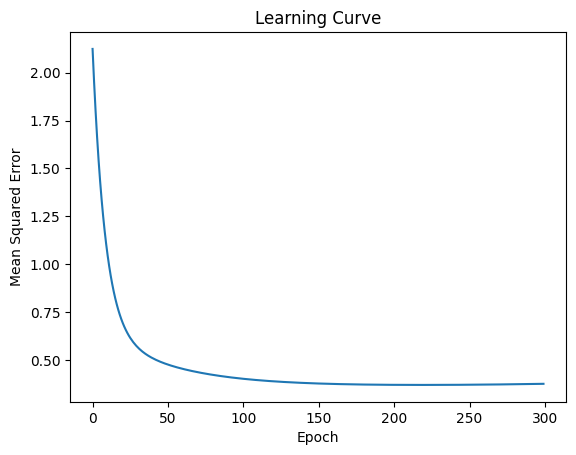

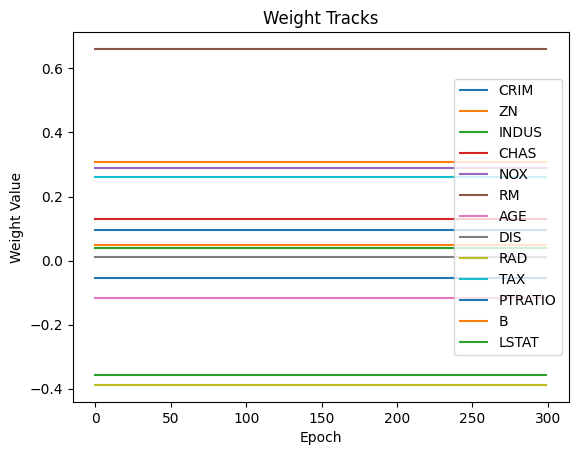

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(error_history)), error_history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.show()

# Plotting the weight tracks
plt.figure()
for i in range(X_train.shape[1]):
    plt.plot([w[i] for w in weight_history], label=legend[i])
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Weight Tracks')
plt.legend()
plt.show()